# Data Science Project: Planning Stage - **UBC Minecraft Research Server**

**Student:** Shaurya V. Shastri  
**Date:** 2025-11-14         
**Course:** DSCI100-009

---
GitHub Repository: https://github.com/shaurya7vs/dsci-project.git

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# reading in data
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


# 1. Data Description

**Files:**
- `players.csv`: one row per unique player with player-level attributes.
- `sessions.csv`: one row per play session with session-level attributes.

Below we loaded both datasets and produce summaries: number of observations/variables, variable names and types, and simple summaries for quantitative columns. Values are reported to **2 decimal places**.

---

## 1) Meaning of Variables

### Players Dataset
This dataset contains one row per player with the following variables:

- **experience** – self-reported Minecraft skill level (e.g., Amateur, Veteran).
- **subscribe** – whether the player opted into email updates.
- **hashedEmail** – anonymized identifier linking players to sessions.
- **played_hours** – total number of hours the player has spent on the server.
- **name** – pseudonym assigned to the player for anonymity.
- **gender** – self-reported gender.
- **Age** – age of the player in years.

### Sessions Dataset
This dataset describes each individual play session:

- **hashedEmail** – links each session to a player.
- **start_time / end_time** – timestamps for when the session began and ended.
- **duration_minutes** – computed session length (in minutes).
- **actions_count** – total actions performed in the session.
- **movement_distance** – distance the player moved during the session.

---

## 2) Visible Data Issues
- Missing values appear in some variables.
- Timestamps require conversion from character to datetime.
- Session duration includes extreme values (likely AFK sessions).
- Players differ widely in total hours and experience.

---

## 3) Potential Hidden Issues
- Server lag or forced disconnects may distort session timing.
- Behaviour may not be representative due to voluntary participation.
- Automatic logging may introduce measurement noise.

---

## 4) How the Data Were Collected
All data was logged automatically by a UBC research Minecraft server. Player behaviour, movement, and timing information were recorded through server events, with no manual data entry.

In [3]:
cat("===== 1. NUMBER OF OBSERVATIONS & VARIABLES =====\n\n")

cat("Players dataset:\n")
cat("Rows:", nrow(players), "\n")
cat("Columns:", ncol(players), "\n\n")

cat("Sessions dataset:\n")
cat("Rows:", nrow(sessions), "\n")
cat("Columns:", ncol(sessions), "\n\n")


cat("===== 2. VARIABLE NAMES AND TYPES =====\n\n")

players_vars <- tibble(
  variable = names(players),
  type = sapply(players, class)
)

sessions_vars <- tibble(
  variable = names(sessions),
  type = sapply(sessions, class)
)

cat("Players variables:\n")
print(players_vars)
cat("\n")

cat("Sessions variables:\n")
print(sessions_vars)
cat("\n")


cat("===== 3. SUMMARY STATISTICS (NUMERIC VARIABLES ONLY) =====\n\n")

summary_stats <- function(df) {
    df |>
    select(where(is.numeric)) |>
    summarise(across(everything(), list(mean = function(x) round(mean(x, na.rm = TRUE), 2),
                                        sd = function(x) round(sd(x, na.rm = TRUE), 2),
                                        min = function(x) round(min(x, na.rm = TRUE), 2),
                                        max = function(x) round(max(x, na.rm = TRUE), 2)),
                                        .names = "{.col}_{.fn}"))}

cat("Players numeric summary:\n")
print(summary_stats(players))
cat("\n")

cat("Sessions numeric summary:\n")
print(summary_stats(sessions))
cat("\n")

===== 1. NUMBER OF OBSERVATIONS & VARIABLES =====

Players dataset:
Rows: 196 
Columns: 7 

Sessions dataset:
Rows: 1535 
Columns: 5 

===== 2. VARIABLE NAMES AND TYPES =====

Players variables:
# A tibble: 7 × 2
  variable     type     
  <chr>        <chr>    
1 experience   character
2 subscribe    logical  
3 hashedEmail  character
4 played_hours numeric  
5 name         character
6 gender       character
7 Age          numeric  

Sessions variables:
# A tibble: 5 × 2
  variable            type     
  <chr>               <chr>    
1 hashedEmail         character
2 start_time          character
3 end_time            character
4 original_start_time numeric  
5 original_end_time   numeric  

===== 3. SUMMARY STATISTICS (NUMERIC VARIABLES ONLY) =====

Players numeric summary:
# A tibble: 1 × 8
  played_hours_mean played_hours_sd played_hours_min played_hours_max Age_mean
              <dbl>           <dbl>            <dbl>            <dbl>    <dbl>
1              5.85            28.4  

# 2. Questions

### Broad Question
How do different aspects of player behaviour relate to how long a player stays active in a Minecraft session?

### Specific Question
Can in-game activity measures (such as actions_count and movement_distance) predict session duration for players on the UBC Minecraft research server?

## How the Data Helps Answer This Question
The sessions dataset contains session duration and several behavioural variables that can serve as predictors. These features capture how active players are during a session, which is likely related to how long they stay logged in.

Before modelling, I will ensure timestamps are converted to usable formats, compute session duration, handle missing values, and build a clean dataset with one row per session containing the response (duration) and relevant activity predictors.

# 3. Exploratory Data Analysis and Visualization

In this section, I load the datasets, apply minimal wrangling, and compute basic summaries to understand the structure of the data. I also create a few plots. These plots help reveal general patterns in gameplay behaviour and highlight potential issues to consider before modelling.

played_hours,Age
<dbl>,<dbl>
5.85,21.14


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


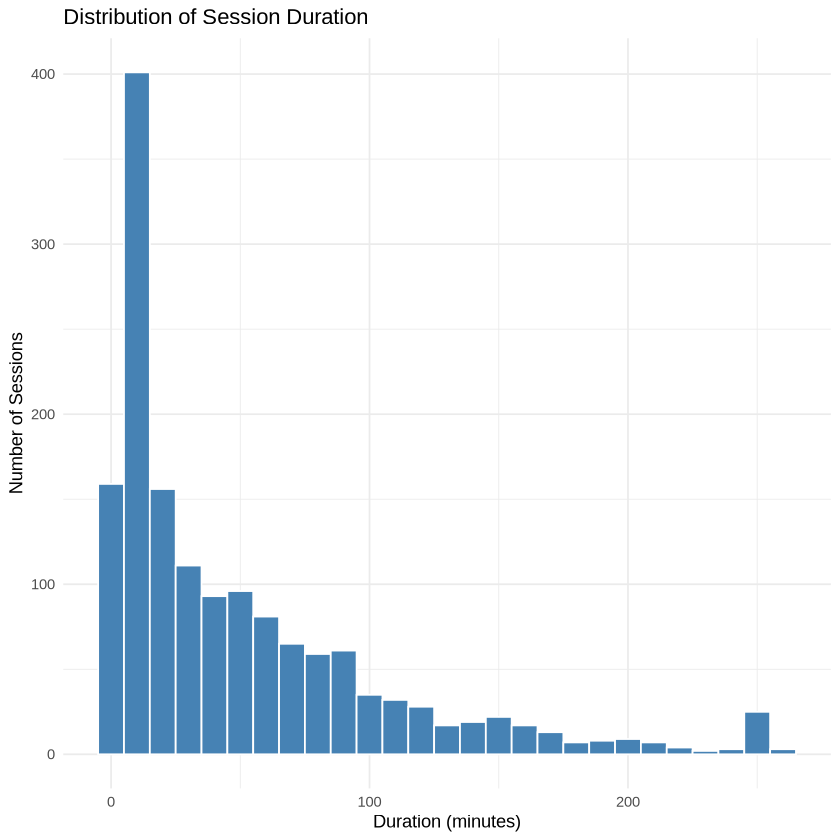

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


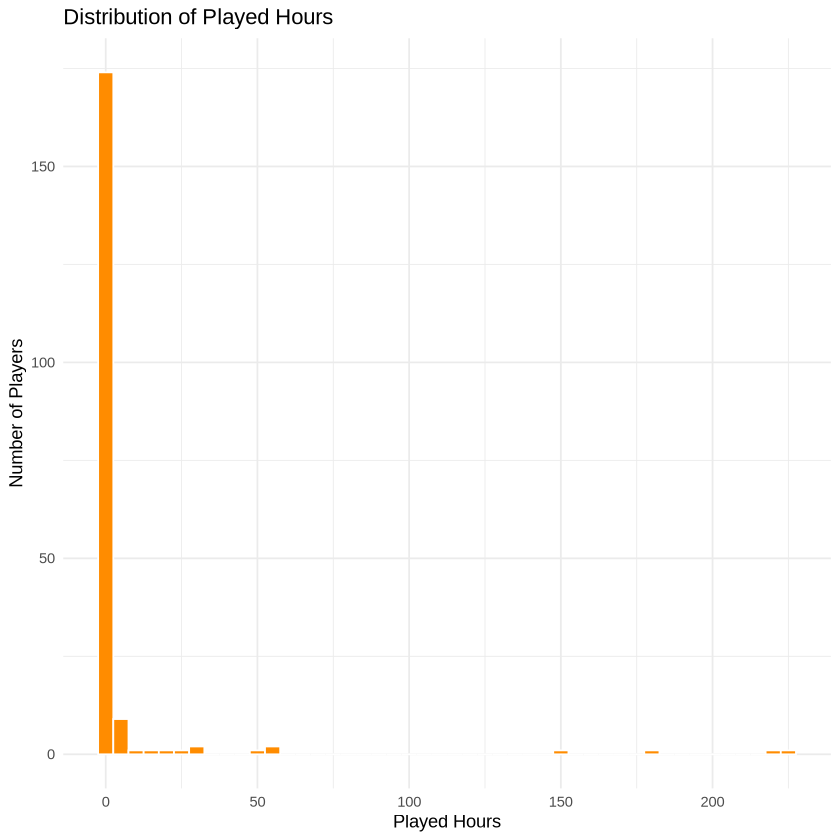

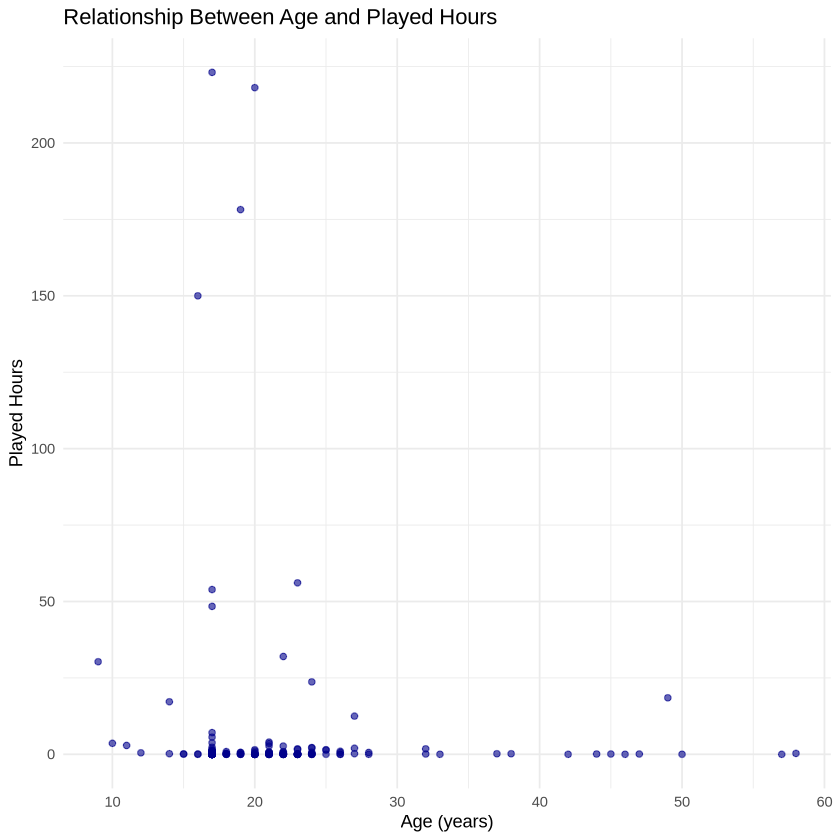

In [4]:
# wrangling
sessions_data <- sessions |>
    # googled how to format time in R
    mutate(start_time = strptime(start_time, format = "%d/%m/%Y %H:%M"),
         end_time   = strptime(end_time,   format = "%d/%m/%Y %H:%M"),
         duration_minutes = as.numeric(difftime(end_time, start_time, units = "mins")))

players_data <- players

# average played hours and average age tibble
player_means <- players_data |>
    select(where(is.numeric)) |>
    summarise(across(everything(), \(x) round(mean(x, na.rm = TRUE), 2)))

player_means

# Session duration distribution
ggplot(sessions_data, aes(x = duration_minutes)) +
  geom_histogram(binwidth = 10, fill = "steelblue", color = "white") +
  labs(title = "Distribution of Session Duration",
       x = "Duration (minutes)",
       y = "Number of Sessions") +
  theme_minimal()

# Played hours distribution
ggplot(players_data, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "darkorange", color = "white") +
  labs(title = "Distribution of Played Hours",
       x = "Played Hours",
       y = "Number of Players") +
  theme_minimal()

# Age vs played hours
ggplot(players_data, aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.6, color = "darkblue") +
    labs(title = "Relationship Between Age and Played Hours",
       x = "Age (years)",
       y = "Played Hours") +
    theme_minimal()

### Interpreting Visualizations
- Session duration is heavily right-skewed, with some extremely long (AFK) sessions.
- Played hours are also skewed, with many low-activity players and a few very active ones.
- Experienced players generally show higher total playtime.
- Overall variability suggests player activity could help predict session duration.

# 4. Methods and Plan

To address whether gameplay activity measures such as actions_count and movement_distance can predict session duration, I plan to use **K-Nearest Neighbours (KNN) regression** as my primary modelling method.

### Why This Method Is Appropriate
KNN is a flexible, non-parametric method that does not assume a linear relationship between predictors and the response. Player behaviour data is typically irregular and non-linear, making KNN well suited to capturing local patterns in actions or movement that may relate to duration.

### Assumptions
KNN requires:
- a meaningful distance metric
- standardized numeric predictors
- enough local data density for stable neighbourhoods

### Limitations
- Sensitive to outliers and irrelevant variables.
- Computationally heavier with larger datasets.
- Performance depends strongly on the choice of k.

### Model Comparison Plan
I will tune k using cross-validation and evaluate models using RMSE and R^2. A simple linear regression model may be used as a baseline to check whether non-linear structure is present.

### Data Processing Plan
1. Standardize all numeric predictors.
2. Split the dataset into 80% training and 20% testing.
3. Use fold cross-validation to select k.
4. Evaluate the final model on the untouched test set.

I think this method will ensure unbiased evaluation and support a transparent model selection process. Since none of my data is linear I disregarded linear regression model.

In [5]:
source("cleanup.R")